This file plots the prediction of parent nodes vs child nodes (left and right children)

In [1]:
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
from node import *
from SplittingPredictions import *

CNN = keras.models.load_model("../CNN_Non_Dense")
raw_data = pd.read_csv("IMDB_sentences.csv")

Creating the tree list for n given examples

In [2]:
total_tree_list = list()
n = 10000
tree_depth = 5

for i in range(0, n): # Iterating n times to get the tree_list for the required number of examples
    tree_list = Splitting_texts(raw_data.iloc[i].Sentences, tree_depth, 1, list(), delim=" ") # splitting the sentences into subsections
    tree_list = predictions(tree_list, CNN) # getting predictions for each subsection
    total_tree_list.append(tree_list)
    
    print("{}%".format(float(i/(n-1)*100)))
 

2023-10-21 11:12:16.567053: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


0.0%
0.010001000100010001%
0.020002000200020003%
0.030003000300030006%
0.040004000400040006%
0.05000500050005%
0.06000600060006001%
0.07000700070007%
0.08000800080008001%
0.09000900090009001%
0.1000100010001%
0.11001100110011%
0.12001200120012002%
0.13001300130013002%
0.14001400140014%
0.15001500150015%
0.16001600160016002%
0.17001700170017%
0.18001800180018002%
0.19001900190019003%
0.2000200020002%
0.21002100210021002%
0.22002200220022%
0.23002300230023%
0.24002400240024005%
0.25002500250025006%
0.26002600260026004%
0.27002700270027%
0.28002800280028%
0.29002900290029%
0.3000300030003%
0.31003100310031007%
0.32003200320032005%
0.33003300330033003%
0.34003400340034%
0.35003500350035005%
0.36003600360036003%
0.37003700370037007%
0.38003800380038005%
0.39003900390039004%
0.4000400040004%
0.41004100410041006%
0.42004200420042004%
0.4300430043004301%
0.44004400440044%
0.45004500450045004%
0.46004600460046%
0.47004700470047006%
0.4800480048004801%
0.49004900490049%
0.5000500050005001%
0.510

Now creating the parent_list and the left_child and right_child lists for plotting

In [6]:
parent_list = list()
left_child_list = list()
right_child_list = list()


for i in range(0, n): # iterating over all tree_lists
    for j in range(0, len(total_tree_list[i])-1): # for the moment we will just be taking the A node as the centre node
        if(total_tree_list[i][j]['A'] != '.' and (total_tree_list[i][j+1]['A'] != '.' or total_tree_list[i][j+1]['B'] != '.')):
            parent_list.append(total_tree_list[i][j]['Prediction_A'])
            left_child_list.append(total_tree_list[i][j+1]['Prediction_A'])
            right_child_list.append(total_tree_list[i][j+1]['Prediction_B'])


Now Graphing

Text(0.5, 0.5, 'right child prediction')

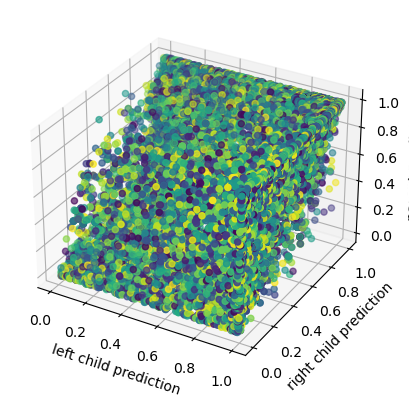

In [13]:
# %matplotlib widget
cm = plt.get_cmap("viridis")
col=np.arange(len(left_child_list))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(left_child_list, right_child_list, parent_list, c=col, cmap=cm)
ax.set_zlabel("parent prediction")
ax.set_xlabel("left child prediction")
ax.set_ylabel("right child prediction")


In [5]:
plt.show()